# **AP155 Lab Assignment** 
## Module 5: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 25, 25, and 50 points, respectively).

_Due Date_: **5PM of December 7 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Jonabel Eleanor B. Baldres\
_Student No._: 2020-07278\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: 3 December 2022

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** sgd. Jonabel Eleanor Baldres

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **97**/100

Score breakdown:
* Problem 1 - 25/25
* Problem 2 - 24/25
* Problem 3 - 48/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

In [670]:
# importing important libraries
import matplotlib.pyplot as plt
import numpy as np
from math import sin, pi, inf, sqrt

### PROBLEM 1 (25 pts.; 50/50 for code & discussion) 
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits. 

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(15 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. 

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(10 pts.)*

In [671]:
def f(r,t):
  '''defining the equations given'''
  x = r[0] #the value of x is stored as the first index of the array r
  y = r[1] #the value of x is stored as the second index of the array r
  fx = alpha * x - beta * x * y # dx/dt
  fy = gamma * x * y - delta * y #dy/dt
  return np.array([fx,fy],float) 

In [672]:
#listing all the constants provided
alpha = 1
beta = 0.5
delta = 2
gamma = 0.5
a= 0.0 #starting time
b = 30.0 #end time
N= 1000 #number of steps
h = (b-a) / N

In [673]:
tpoints = np.arange(a,b,h)
xpoints = [] # where we store the values for x 
ypoints = [] # where we store the values for y

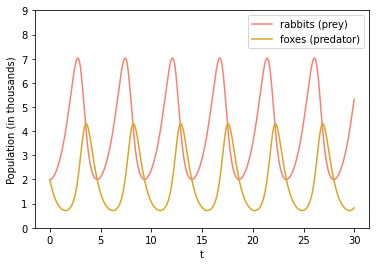

In [674]:
#code for the runge-kutta methood
r = np.array([2.0, 2.0]) #here, the initial conditions of x and y starts at 2
for t in tpoints:
  xpoints.append(r[0])
  ypoints.append(r[1])
  k1 = h * f(r,t)
  k2 = h * f(r+ 0.5 * k1, t+0.5*h)
  k3 = h *f(r+0.5*k2, t+0.5*h)
  k4 = h*f(r+k3,t+h)
  r += (k1+2*k2+2*k3+k4) / 6

fig, ax = plt.subplots()
ax.plot(tpoints, xpoints, color = 'salmon', label = 'rabbits (prey)')
ax.plot(tpoints,ypoints, color = 'goldenrod', label = 'foxes (predator)')
ax.set_ylim(0,9)
ax.set_xlabel('t')
ax.set_ylabel('Population (in thousands)')
ax.legend()

The Lotka-Volterra model predicts that the prey consumption rate of a predator has a direct relationship to the prey abundance. From the graph, we can support what the model predicts. The prey population has a positive effect on the fox population. On the other hand, the predator population has a negative effect on the prey population. When the population of the prey rises, there is abundant food source for the predator making their population grow as well.

### PROBLEM 2 (25 pts.; 50/50 for code & discussion)

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(15 pts.)*

2. Make a graph of $\theta$ as a function of time. *(10 pts.)*


To solve, we first turn the given second-order equation into two first-order equations since nonlinear equations are not easy to solve. Our initial equation of motion for the pendulum is 

\begin{align}
  \frac{d^2 \theta}{dt^2} = - \frac{g}{l} \sin{\theta}
  \end{align}

Defining a new variable $\omega$ by
 \begin{align}
  \frac{d \theta}{dt} = \omega
  \end{align}

The initial equation becomes

\begin{align}
  \frac{d \omega}{dt} = -\frac{g}{l} \sin{\theta}
  \end{align}

In [675]:
#constants
g = 9.81 # gravity
l = 0.1 # length
a = 0
b = 10
N = 1000
h = (b-a)/N
theta = np.deg2rad(179) #converting the degree to radians


In [676]:
def f(r,t):
  '''defining the equation'''
  theta = r[0] # assigning theta values as the first index of array r
  omega = r[1] # assigning theta values as the second index of array r
  ftheta = omega # definition of the new variable
  fomega = - (g/l) * sin(theta)  # modification of the initial equation
  return np.array([ftheta, fomega], float)

In [677]:
tpoints = np.arange(a,b,h) 
radians = [] # to store the values of radians

(0.0, 10.0)

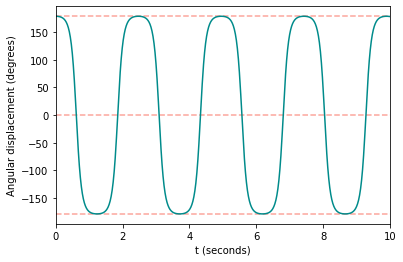

In [678]:
r = np.array([theta, 0],float)
#using the runge-kutta method
for t in tpoints:
  radians.append(r[0])
  k1 = h * f(r,t)
  k2 = h * f(r+ 0.5 * k1, t+0.5*h)
  k3 = h *f(r+0.5*k2, t+0.5*h)
  k4 = h*f(r+k3,t+h)
  r += (k1+2*k2+2*k3+k4) / 6

max, min = 0,0
for x in range(len(radians)): #converting back to degrees
  radians[x] = np.degrees(radians[x]) 
  if radians[x] > max:
    max = radians[x]
  if radians[x] < min:
    min = radians[x]


fig, ax = plt.subplots()
ax.axhline(y=max, linestyle = '--', color = 'salmon', alpha = 0.7)
ax.axhline(y=min, linestyle = '--', color = 'salmon', alpha = 0.7)
ax.axhline(y =0, linestyle = '--', color = 'salmon', alpha = 0.7)
ax.plot(tpoints, radians, color = 'darkcyan')
ax.set_xlabel('t (seconds)')
ax.set_ylabel('Angular displacement (degrees)')
ax.set_xlim(0,10)

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Quantum Oscillators**

_Refer to Exercise 8.14 of the Newman text_ Consider the one-dimensional, time-independent Schrodinger equation in a harmonic (i.e., quadratic) potential $V(x) = V_0 x^2 / a^2$, where $V_0$ and $a$ are constants. 

1. Modify the code from Example 8.9 to find the energies of the ground state and the first two excited states for this potential when $m$ is the electron mass, $V_0 = 50$ eV, and $a = 10^{-11}$ m. Note that in theory the wavefunction goes all the way out to $x = \pm \infty$, but you can get good answers by using a large but finite interval. Try using $x = - 10a$ to $+10a$, with the wavefunction $\psi = 0$ at both boundaries. (In effect, you are putting the harmonic oscillator in a box with impenetrable walls.) The wavefunction is real everywhere, so you don't need to use complex variables, and you can use evenly spaced points for the solution-- there is no need to use an adaptive method for this problem.

   The quantum harmonic oscillator is known to have energy states that are equally spaced. Check that this is true, to the precision of your calculation, for your answers. (Hint: The ground state has energy in the range 100 to 200eV.) *(20 pts.)*

2. Modify the code from (1) to calculate the same three energies for the anharmonic oscillator with $V(x) = V_0 x^4 /a^4$, with the same parameter values. *(10 pts.)*

3. Calculate the properly normalized wavefunctions of the anharmonic oscillator for the three states. To normalize the wavefunctions you will have to calculate the value of the integral $\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x$ and then rescale $\psi$ appropriately to ensure that the area under the square of each of the wavefunctions is 1. Either the trapezoidal rule or Simpson's rule will give you a reasonable value for the integral. *(15 pts.)*

   Note that you may find a few very large values at the end of the array holding the wavefunction. Where do these large values come from? Are they real, or spurious? One simple way to deal with the large values is to make use of the fact that the system is symmetric about its midpoint and calculate the integral of the wavefunction over only the left-hand half of the system, then double the result. This neatly misses out the large values. 

4. Make a plot of the normalized wavefunctions from (3), all on the same axes, as a function of $x$ over a modest range near the origin-- say $x = -5a$ to $x =+5a$. *(5 pts.)*



The time-independent Schrodinger equation is given by the formula

\begin{align}
  - \frac{\hbar}{2m} \frac{d^2 \psi}{dx^2} + V(x) \psi (x) = E \psi (x)
  \end{align}
where $\psi(x)$ is the wavefunction, $V(x)$ is the potential energy at position $x$, and $E$ is the total energy of the particle, plus kinetic. 

Since the equation is in second-order, we turn them into first-order equations. We let

\begin{align}
  \frac{d \psi }{dx} = \phi \hspace{1cm} \frac{d \phi}{dx} = \frac{2m}{\hbar^2} [V(x) - E] \psi 
  \end{align}

Note that we know that $psi = 0$ at $x = 0$ however, we lack the knowledge on the value of $\frac{d\psi}{dx}$ resorting to varying the energy $E$ and calculating it from the range provided. 

In [679]:
#constants
m = 9.1094e-31
e = 1.6022e-19
V_0 = 50. * e #eV
a = 1.e-11 #m
x_1 = -10. * a
x_2 = 10. *a
hbar = 1.0546e-34 #Planck's constant
N = 1000
h = (x_2 - x_1) / N


In [680]:
# Function
def V(x): 
  return V_0 * (x ** 2) / (a**2)

def f(r,x,E): 
  psi = r[0]
  phi = r[1]
  fpsi = phi
  fphi = (2*m/ hbar **2) * (V(x)-E) * psi
  return np.array([fpsi,fphi], float)

# Calculate the wavefunction for a particular energy
def solve(E):
  psi = 0.0
  phi = 1.0
  r = np.array([psi,phi], float)

  for x in np.arange(x_1,x_2,h):
    k1 = h * f(r,x,E)
    k2 = h * f(r+ 0.5 * k1, x+0.5*h, E)
    k3 = h * f(r+ 0.5 * k2, x+0.5*h, E)
    k4 = h*f(r+k3,x+h,E)
    r += (k1+2*k2+2*k3+k4) / 6

  return r[0]

In [681]:
E1 = 0.0
E2 = e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2) > target:
  psi1,psi2 = psi2,solve(E2)
  E1,E2 = E2, E2 - psi2*(E2 - E1) / (psi2 -psi1)

GS = E2/e
print("The ground state energy is ", E2/e, "eV")


The ground state energy is  138.02397130603683 eV


In [682]:
E1 = 140 * e
E2 = 300 * e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2) > target:
  psi1,psi2 = psi2,solve(E2)
  E1,E2 = E2, E2 - psi2*(E2 - E1) / (psi2 -psi1)

FE = E2/e
print("The first excited state energy is ", FE, "eV")

The first excited state energy is  414.07191654124284 eV


In [683]:
E1 = 420 * e
E2 = 700 * e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2) > target:
  psi1,psi2 = psi2,solve(E2)
  E1,E2 = E2, E2 - psi2*(E2 - E1) / (psi2 -psi1)

SE = E2/e
print("The second excited state energy is ", SE, "eV")

The second excited state energy is  690.1198621200641 eV


To check that the quantum harmonic oscillator's energy states are equally spaced, we divide the first and second excited state to the ground state. Shown below is the result that shows that the energies are quantized.

In [684]:
print(round(FE / GS)) # dividing the first excited state by the ground state energy
print(round(SE/GS)) # dividing the second excited state by ground state energy

3
5


We do the same thing for number 2 however, with different value for $V(x)$

In [685]:
# Function
def V(x): 
  return V_0 * (x ** 4) / (a**4)

def f(r,x,E): 
  psi = r[0]
  phi = r[1]
  fpsi = phi
  fphi = (2*m/ hbar **2) * (V(x)-E) * psi
  return np.array([fpsi,fphi], float)

def solve(E):
  psi = 0.0
  phi = 1.0
  r = np.array([psi,phi], float)

  for x in np.arange(x_1,x_2,h):
    k1 = h * f(r,x,E)
    k2 = h * f(r+ 0.5 * k1, x+0.5*h, E)
    k3 = h * f(r+ 0.5 * k2, x+0.5*h, E)
    k4 = h*f(r+k3,x+h,E)
    r += (k1+2*k2+2*k3+k4) / 6

  return r[0]


In [686]:
E1 = 0.0
E2 = e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2) > target:
  psi1,psi2 = psi2,solve(E2)
  E1,E2 = E2, E2 - psi2*(E2 - E1) / (psi2 -psi1)

GS = E2/e
print("The ground state energy is", GS, "eV")

The ground state energy is 205.30690346934932 eV


In [687]:
E1 = 0 * e
E2 = 400 * e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2) > target:
  psi1,psi2 = psi2,solve(E2)
  E1,E2 = E2, E2 - psi2*(E2 - E1) / (psi2 -psi1)

FS = E2/e
print("The first excited state energy is = ", FS, "eV")

The first excited state energy is =  735.691247040332 eV


In [688]:
E1 = 0 * e
E2 = 1500 * e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2) > target:
  psi1,psi2 = psi2,solve(E2)
  E1,E2 = E2, E2 - psi2*(E2 - E1) / (psi2 -psi1)

SE = E2/e
print("The second excited state energy is ", SE , "eV")

The second excited state energy is  1443.5694213261647 eV


In [689]:
#converting the ground state, first and second state energy into an array and setting the precision up to 14 decimal places
anharmonic = np.array([GS, FS, SE])
np.set_printoptions(precision=14)
anharmonic

array([ 205.30690346934932,  735.691247040332  , 1443.5694213261647 ])

Number 3 \
In this problem, we normalize the wavefunction. To do that, we use the equation

\begin{align}
  \int_{-∞}^{∞} |\psi (x)|^2  = 1
  \end{align}

Here, we use the Simpsons rule and taking into account that the boundaries are equal to zero, meaning $f(a) = f(b) = 0$, and that the values of $\psi$ are already evenly spaced,  our Simpsons rule becomes

\begin{align}
\frac{1}{3} \left[ 4 \sum_{k \ odd} f(a+kh) + 2 \sum_{k \ even} f(a+kh) \right]
  \end{align}

In [690]:
a = 1.e-11 #m
x1 = -5 * a
x2 = 5 * a
N = 1000
h = (x2 - x1) / N


In [691]:
t_point = np.arange(x1, x2, h)
def get_psi(E):
  '''to get the values of psi given the energies'''

  x_points = []
  psi = 0.0
  phi = 1.0
  r = np.array([psi,phi], float)

  for t in t_point:
    x_points.append(r[0])
    k1 = h * f(r,t,E)
    k2 = h * f(r+ 0.5 * k1, t+0.5*h, E)
    k3 = h * f(r+ 0.5 * k2, t+0.5*h, E)
    k4 = h*f(r+k3,t+h,E)
    r += (k1+2*k2+2*k3+k4) / 6

  x = np.array(x_points)
  return x



To get the normalization constant $N$, we use the equation 
\begin{align}
  N = \sqrt{\frac{1}{\int_{-∞}^{∞} |\psi (x)|^2}}
  \end{align}

In this problem, we restrain our limits of integration from $-5a$ to $5a$ 

In [692]:
# to get the values of psi
ground_psi = np.array(get_psi(anharmonic[0] * e))
first_psi = np.array(get_psi(anharmonic[1] * e))
second_psi = np.array(get_psi(anharmonic[2] * e))
np.set_printoptions(precision=14)

In [693]:
def simpsons(psi):
  '''defining simpsons rule to solve the given integral'''
  I_1, I_2 = 0,0
  I = 0
  for k in range(1,N,2):
    I_1 += psi[k]
  for k in range(2,N,2):
    I_2 += psi[k]

  I = (1/3) * (4*I_1 + 2*I_2)
  return I

In [694]:
# Getting the normalization constants
N0 = np.sqrt(1/simpsons(ground_psi ** 2))
N1 = np.sqrt(1/simpsons(first_psi ** 2))
N2 = np.sqrt(1/simpsons(second_psi ** 2))

#Values for normalized wavefunctions
psi_normal = N0 * ground_psi
psi1_normal = N1 * first_psi
psi2_normal  = N2 * second_psi

print("The normalization constants are " + str(N0) + ", "+ str(N1) + " and "+ str(N2))

The normalization constants are 11111.845815185508, 39521.62179691883 and 120632.37150139798


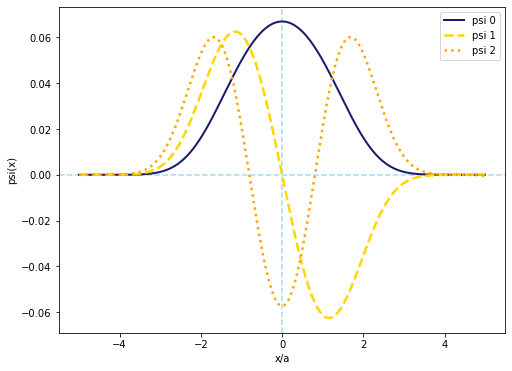

In [695]:
#plotting the wavefunctions
tvalue = t_point / a

fig,ax = plt.subplots(figsize=(8,6))
ax.axvline(0, color = 'lightskyblue', linestyle = '--', alpha = 0.75)
ax.axhline(0, color = 'lightskyblue', linestyle = '--', alpha = 0.75)
ax.plot(tvalue, psi_normal, label = 'psi 0', color = 'midnightblue', linewidth = 2)
ax.plot(tvalue, psi1_normal,label = 'psi 1', color = 'gold', linestyle = '--',linewidth = 2.5)
ax.plot(tvalue, psi2_normal,label = 'psi 2', color = 'orange', linestyle = 'dotted',linewidth = 2.5)
ax.legend()
ax.set_xlabel('x/a')
ax.set_ylabel('psi(x)')
plt.show()